In [1]:
import nltk
from nltk import word_tokenize
from nltk import FreqDist # need this to access "most_common" method

import urllib2

from IPython.display import Image

### Regular Expressions for Detecting Word Patterns

https://www.tutorialspoint.com/python/python_reg_expressions.htm
http://www.nltk.org/book/ch03.html

In [2]:
import re

In [3]:
wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()]

#### Search for words that end with "ed", re.search("xxx$", word)

This function searches for first occurence of RE pattern within string with optional flags.

In [4]:
[w for w in wordlist if re.search('ashed$', w)]

[u'abashed',
 u'dashed',
 u'slashed',
 u'spatterdashed',
 u'splashed',
 u'unabashed',
 u'unbedashed',
 u'undashed',
 u'ungashed',
 u'unhashed',
 u'unlashed',
 u'unleashed',
 u'unmashed',
 u'unplashed',
 u'unquashed',
 u'unsashed',
 u'unslashed',
 u'unsplashed',
 u'unsquashed',
 u'unthrashed',
 u'untrashed',
 u'unwashed',
 u'unwhitewashed',
 u'washed']

#### Search for words that start with "miao", re.search("^xxx", word)

In [5]:
[w for w in wordlist if re.search('^miao', w)]

[u'miaow', u'miaower']

#### Search using wildcards

In [6]:
[w for w in wordlist if re.search('^sa...f.ed$', w)]

[u'satisfied']

#### Search using "?". "?" means the previous character is optional.

In [7]:
[w for w in wordlist if re.search('^basketballm?$', w)] # the character "m" is optional.

[u'basketball']

#### Search using [xyz...]. This means picking one of the charactere from "xyz...".

In [8]:
[w for w in wordlist if re.search('^[abc][bca][rys]$', w)]

[u'aby', u'bar', u'bas', u'bay', u'car', u'cay']

#### Search using "+". "+" means one or more instances of the proceeding item.

In [9]:
[w for w in wordlist if re.search('^swe+t$', w)]

[u'sweet']

#### Regular Expression operators summary

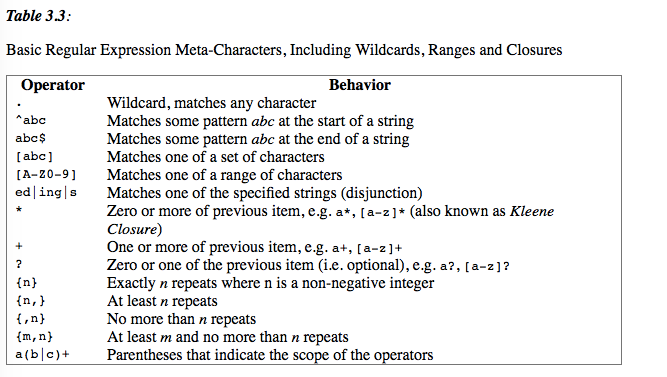

In [10]:
Image(filename='ss3.png')

### Useful Application of Regular Expressionn

We can use Regular Expression to extract material from words or to modify words in specific ways.

#### Extracting Word Pieces

"re.findall()" finds all matches of the given regular expression.

In [12]:
word = 'supercalifragilisticexpialidocious'
re.findall(r'[ae]', word)

['e', 'a', 'a', 'e', 'a']

In [13]:
len(re.findall(r'[ae]', word))

5

#### Doing More with Word Pieces

It is sometimes noted that English text is highly redundant, and it is still easy to read when word-internal vowels are left out. For example, declaration becomes dclrtn, and inalienable becomes inlnble, retaining any initial or final vowel sequences. The regular expression in our next example matches initial vowel sequences, final vowel sequences, and all consonants; everything else is ignored. This three-way disjunction is processed left-to-right, if one of the three parts matches the word, any later parts of the regular expression are ignored. We use re.findall() to extract all the matching pieces, and ''.join() to join them together (see 3.9 for more about the join operation).

In [14]:
regexp = r'^[AEIOUaeiou]+|[AEIOUaeiou]+$|[^AEIOUaeiou]'
def compress(word):
    pieces = re.findall(regexp, word)
    return ''.join(pieces)

In [15]:
english_udhr = nltk.corpus.udhr.words('English-Latin1')
print(nltk.tokenwrap(compress(w) for w in english_udhr[:75]))

Unvrsl Dclrtn of Hmn Rghts Prmble Whrs rcgntn of the inhrnt dgnty and
of the eql and inlnble rghts of all mmbrs of the hmn fmly is the fndtn
of frdm , jstce and pce in the wrld , Whrs dsrgrd and cntmpt fr hmn
rghts hve rsltd in brbrs acts whch hve outrgd the cnscnce of mnknd ,
and the advnt of a wrld in whch hmn bngs shll enjy frdm of spch and


#### Word Pairs

In [17]:
rotokas_words = nltk.corpus.toolbox.words('rotokas.dic')

In [18]:
word_pair = [pair for word in rotokas_words for pair in re.findall(r'[ptksvr][aeiou]',word)]

In [20]:
# Conditional Frequency Distribution
cfd = nltk.ConditionalFreqDist(word_pair)
cfd.tabulate()

    a   e   i   o   u 
k 418 148  94 420 173 
p  83  31 105  34  51 
r 187  63  84  89  79 
s   0   0 100   2   1 
t  47   8   0 148  37 
v  93  27 105  48  49 
